<a href="https://colab.research.google.com/github/SIMIYU7Y0/Hello-world/blob/features/SIMPLE_GOLD_PRICE_PREDICTION_MODEL_USING_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


DATA COLLECTION AND PREPROCEING


In [5]:
df=pd.read_csv("/content/gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#printing the last 5 rows
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
df.shape

(2290, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#check the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
#STATISTICAL INSIGHT
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
#correlation
correlation= df.corr()

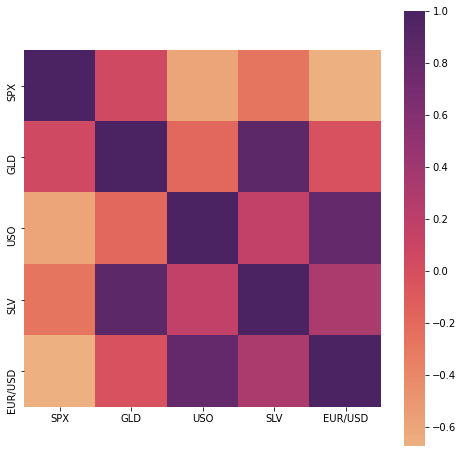

In [42]:
#CONSTRCTNG A HEAT MAP
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True,cmap='flare')


In [26]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


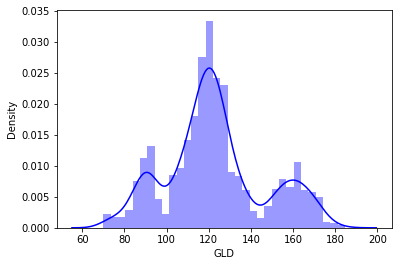

In [27]:
#CREATING GOLD PRICE DISTRIBUTION
sns.distplot(df['GLD'], color='blue')

In [31]:
#spliting the features
x=df.drop(['Date', 'GLD'],axis=1)
y=df['GLD']
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [34]:
#getting trainig and testing data separate
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [36]:
#Training the model
regessor= RandomForestRegressor(n_estimators=100)

In [37]:
regessor.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
#Evaluating our model based on the tets data
predicted= regessor.predict(x_test)

In [40]:
print(predicted)

[168.2641023   81.60540191 113.4526     127.55829819 120.02730231
 154.1028047  149.18560184 126.12690154 117.38670043 125.84309859
 115.78439856 167.85369684 141.92560143 168.92029797 115.30879923
 118.92399924 135.98939893 170.43879734 159.61419758 165.59969938
 154.85240086 127.41479692 176.03020057 157.21260275 125.2341989
  93.80620102  76.96340074 120.06000165 118.98639847 167.42099923
  87.87860049 124.86230199  91.27350203 116.19779917 121.0330976
 134.46829834 116.20050175 114.54269904 139.26120082 106.21770104
 104.95150258  87.65409874 126.63900025 116.99280056 157.15609619
 119.53179932 109.21520233 108.35470158  93.29669838 127.11420253
  72.92650163 113.53470068 119.83829993 109.92209923 119.09499846
 120.30780154 160.15559942 164.06370355 146.68960219  85.92889866
  94.00239956  86.10950134  91.11919911 118.7141988  126.49829819
 127.21810191 170.95049756 122.43630097 116.8894018   98.22409917
 169.21330331 142.83149841 132.13579978 121.31060103 123.3786997
 119.80609835

In [43]:
#FINDING r2 of the model
r2_score=metrics.r2_score(y_test,predicted)
print("R QUARED ERROR:",r2_score)

R QUARED ERROR: 0.9986661007506097


COMPARISON BETWEEN ACTUAL VALUES AND PREDICTED VALUES


In [45]:
y_test=list(y_test)

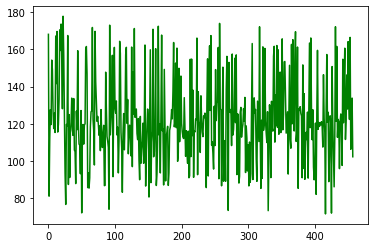

In [46]:
plt.plot(y_test, color='green', label='ACTUAL VALUES')

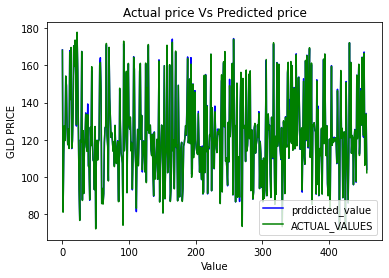

In [49]:
plt.plot(predicted, color='blue', label='prddicted_value')
plt.plot(y_test, color='green', label='ACTUAL_VALUES')
plt.title('Actual price Vs Predicted price')
plt.ylabel('GLD PRICE')
plt.xlabel('Value')
plt.legend()
plt.show()